<a href="https://colab.research.google.com/github/joliebao/TCS-Data-Science-Obesity/blob/main/TCS_DataScience_Obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# **Obesity Data Set**


---




Obesity is a growing global health issue that affects people of all ages and backgrounds. Understanding the relationship between daily habits—such as diet and physical activity—and obesity levels can help identify patterns that contribute to weight gain. This project uses a publicly available dataset on obesity levels based on eating habits and physical condition to explore these patterns through data analysis.

By applying data science techniques such as data cleaning, visualization, and classification, this project aims to uncover how specific behaviors influence body weight categories. The goal is to develop insights that may inform healthier lifestyle choices for teens and young adults. Ultimately, this research demonstrates how data science can be used to address real-world health challenges.


***Research Question***

***Which lifestyle conditions are most strongly associated with obesity and how can interpretable models use these factors to predict an individual’s obesity level??***

[lightning talk](https://docs.google.com/presentation/d/1o6r-KHoWxboRM3AzJinTjRKG9IGmmXnttzow2Plcp7Q/edit?slide=id.p#slide=id.p)



---


***Research***

*Pre-Dataset Exploration*:
+ Sources - https://www.semanticscholar.org/reader/f3cec32ad3afdc60376a26165c81acc5e6536c4d
https://pmc.ncbi.nlm.nih.gov/articles/PMC7484407/
https://link.springer.com/article/10.1007/s10995-018-02696-y


Obesity is classified as an abnormal accumulation of fat. It is sometimes considered an eating disorder.

Causes:


*   Eating habits
*   Unhealthy lifestyle



Effects:

*   Increased vulnerability to illness
*   Reduced immunity
*   Sensory changes
*   Decreased productivity
*   Increased cardiovascular conditions
*   Metabolic abnormalities
*   Increased chance of developing chronic diseases

Demographics:


*   Mostly found in minority groups (ex. ethnic/racial minorities, women, and lower class).
*   It has been found that these demographics are consistent with minorities because of stress and unfair treatment received by society.
*   It has also been linked to food insecurity from youth.
*   Obesity linked to alcohol consumption
*   Obesity linked with calorie dense food consumption
*   Children experience obesity from direct interaction with family as they build the same habits


***Importing***

In [82]:
#importing libraries and cloning repo

!git clone https://github.com/joliebao/TCS-Data-Science-Obesity

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

fatal: destination path 'TCS-Data-Science-Obesity' already exists and is not an empty directory.


In [83]:
# convert downloaded dataset into accessible dataset
url = 'https://raw.githubusercontent.com/joliebao/TCS-Data-Science-Obesity/refs/heads/main/ObesityDataSet.csv'
df = pd.read_csv(url)

***Basic Dataset Exploration***

**Key Columns:**

  + Gender: Biological sex of the individual

  + Age: Age in years

  + Height: Height in meters

  + Weight: Weight in kilograms

  + Family_history_with_overweight: Overweight in immediate family

  + FAVC: Eats high-calorie foods frequently

  + FCVC: Frequency of vegetable consumption

  + NCP: Number of daily main meals

  + CAEC: Eats between meals

  + SMOKE: Smokes regularly

  + CH2O: Daily water intake

  + SCC: Monitors daily calorie intake

  + FAF: Weekly physical activity frequency

  + TUE: Daily screen time usage

  + CALC: Alcohol consumption frequency

  + MTRANS: Main transportation method

  + NObeyesdad: Obesity classification label


** Note: The Dataset has already been cleaned and filtered (?)

In [84]:
df.shape            # 17 categories, 2111 entries

(2111, 17)

In [85]:
df.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight


In [86]:
df.info()         # all filled out! (all non-null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [87]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


***Data Cleaning***

The data set is tested to be as fair and as consistent as possible. Data set has been determined to be generally clean!

In [88]:
df.isna()             # again all filled out! (all non-null)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [89]:
# GETTING RID OF DUPLICATES
print(df.duplicated().sum()) # Because there are 24 duplicates, they needed to
                             # be removed to decrease bias.
df = df.drop_duplicates()

24


In [90]:
df.shape  # the duplicates were properly removed!

(2087, 17)

In [91]:
# CHECKING VARIANCE OF OBESITY CLASSIFICATIONS
print((df['NObeyesdad'] == 'Normal_Weight').sum())
print((df['NObeyesdad'] == 'Overweight_Level_I').sum())
print((df['NObeyesdad'] == 'Overweight_Level_II').sum())
print((df['NObeyesdad'] == 'Obesity_Type_I').sum())
print((df['NObeyesdad'] == 'Obesity_Type_II').sum())
print((df['NObeyesdad'] == 'Obesity_Type_III').sum())
print((df['NObeyesdad'] == 'Insufficient_Weight').sum())

# Based on these results, the data set is well spread out; containing similarly
# proportional data from various weight groups

282
276
290
351
297
324
267


In [92]:
# CHECKING VARIANCE OF GENDER
print((df['Gender'] == 'Female').sum())

# Gender is also proportional! (Data set has 2087 entries)

1035


In [93]:
def box_Plot(col, plot_title, x_label):
    data = df[col]
    plt.boxplot(data, vert = False)
    plt.xlabel(x_label)
    plt.title(plot_title)

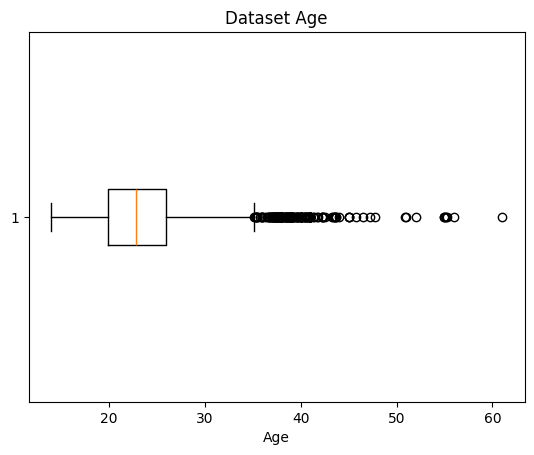

In [94]:
# CHECKING FOR OUTLIERS
box_Plot('Age', "Dataset Age", "Age")

# Age is reasonable
# A lot of outliers
# Dataset does not include early adolescents and children

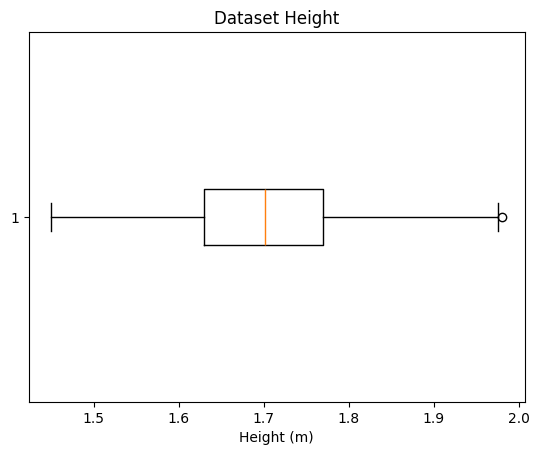

In [95]:
# CHECKING FOR OUTLIERS
box_Plot('Height', 'Dataset Height', 'Height (m)')

# One outlier, but a possible height

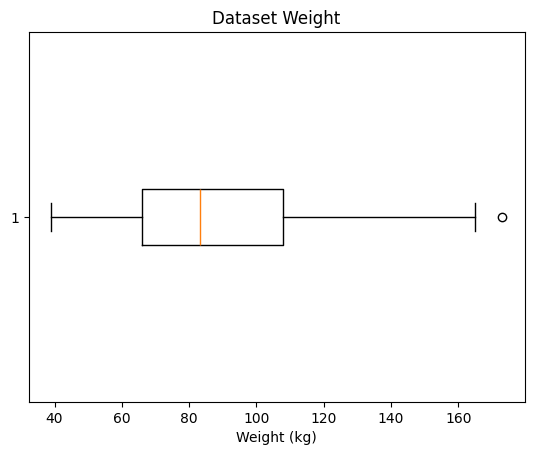

In [96]:
# CHECKING FOR OUTLIERS
box_Plot('Weight', 'Dataset Weight', 'Weight (kg)')

# one outlier, but a possible weight

In [97]:
# Outliers will stay in
# NOTE: CAN BE SEPARATED BY AGE GROUP TO HAVE MORE ACCURATE DATA!
# CONSIDER MAKING TWO MODELS LATER, FOR NOW OUTLIERS WILL BE
# INCORPORTATED INTO ONE MODEL
# COME BACK TO THIS SECTION LATER!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!



---


***Categorical Data Encoding + Visualizations***

Numeric data is easier to be measured and visualized than categorical data.

In [98]:
# Encoding columns to numeric values
df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

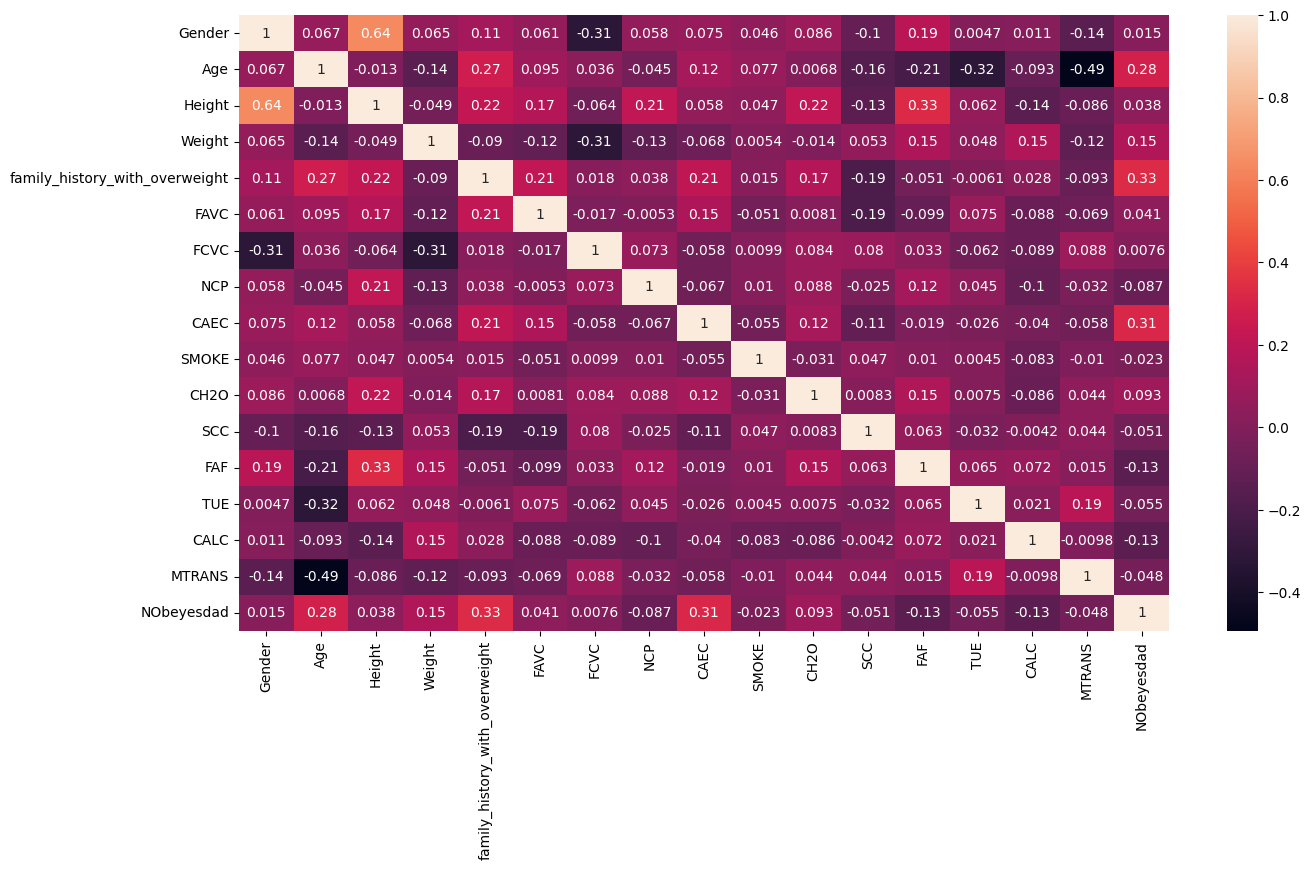

In [99]:
corr = df_encoded.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot = True)
plt.show()

# Creating heatmap to show correlations among features

***Observations***

For deeper observation, some important features that stand out will have their own plots that demonstrate correlations between two variables.




In [100]:
# These are methods that help stay organized and prevent repetition of code
# ------------------------------
def make_bar(x_value, plot_title, x_label, size):
    x = df[x_value]
    plt.bar(x, y, width = size)
    plt.xlabel(x_label)
    plt.ylabel("Obesity Classification")
    plt.xticks(rotation = 90)
    plt.title(plot_title)
    plt.show()

In [101]:
def make_scatter(x_value, plot_title, x_label):
    x = df[x_value]
    plt.scatter(x, y)
    plt.xlabel(x_label)
    plt.ylabel("Obesity Classification")
    plt.xticks(rotation = 90)
    plt.title(plot_title)
    plt.show()

In [102]:
def make_line(x_value, plot_title, x_label):
    x = df[x_value]
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel("Obesity Classification")
    plt.xticks(rotation = 90)
    plt.title(plot_title)
    plt.show()
# ------------------------------


Note:

Obesity Classifications:
* 0 = Insufficient Weight
* 1 = Normal Weight
* 2 = Obesity Type 2
* 3 = Obesity Type 1
* 4 = Obesity Type 3
* 5 = Overweight Level 1
* 6 = Overweight Level 2

In [103]:
y = df_encoded['NObeyesdad']

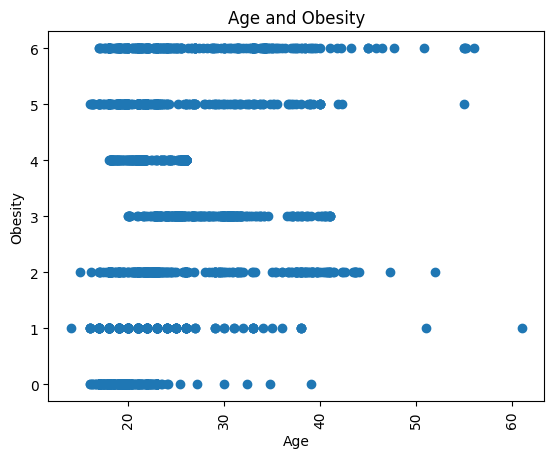

In [126]:
make_scatter('Age', 'Age and Obesity', 'Age')

# Outliers tend to be older people (around 45+)
# Age cannot categorize Obesity

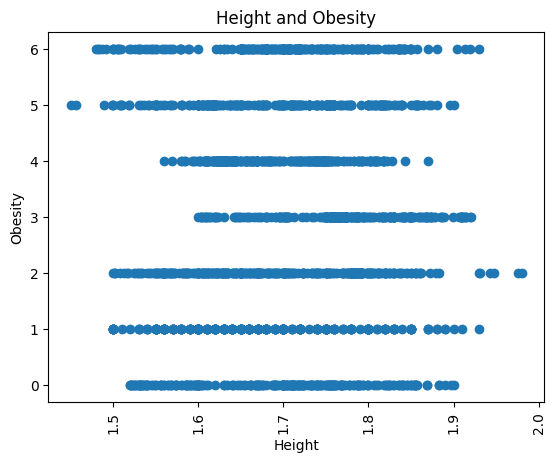

In [105]:
make_scatter('Height', 'Height and Obesity', 'Height')

# Height is relatively neutral

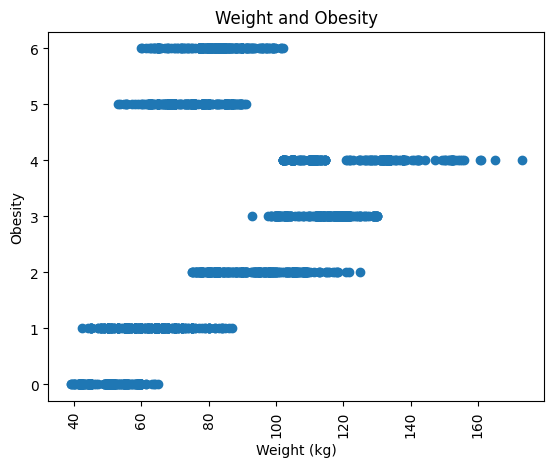

In [106]:
make_scatter('Weight', 'Weight and Obesity', 'Weight (kg)')

# as weight goes up, there's a higher classification of obesity

These plots generally show that the relationships between each individual variable and obesity levels are not unilaterally related.

Other behavioral relationships are explored below:

* Diet Factors
* Habits

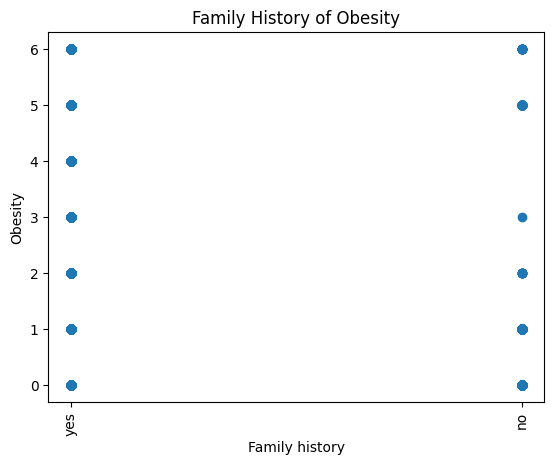

In [107]:
make_scatter('family_history_with_overweight', 'Family History of Obesity', 'Family history')

# regardless of family history, there are all types of obesity classifications
# No Obesity Level III in the data set at all when there is no direct family history of obesity

# CHECK RELATIONSHIP between family history of obesity and weight

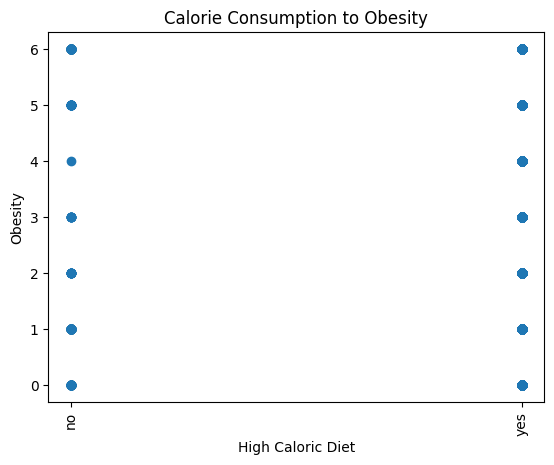

In [148]:
# DIET FACTORS
make_scatter("FAVC", "Calorie Consumption to Obesity", "High Caloric Diet")

# All levels are met regardless of high caloric diet

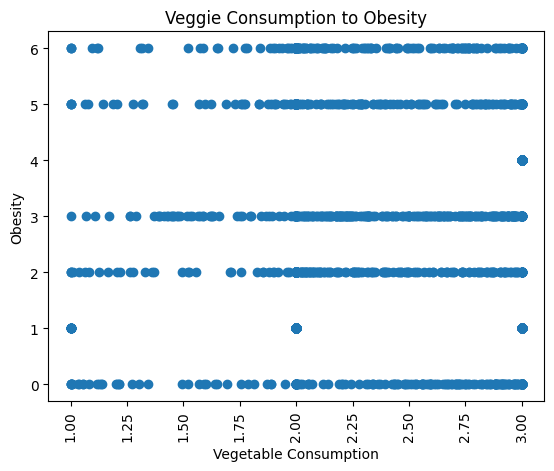

In [109]:
make_scatter("FCVC", "Veggie Consumption to Obesity", "Vegetable Consumption")

# Vegetable consumption doesn't seem to have much correlation to obesity
# Some cases of people are classified as obese or overweight despite eating more vegetables
# Seems to be more people that are considered overweight despite eating more vegetables

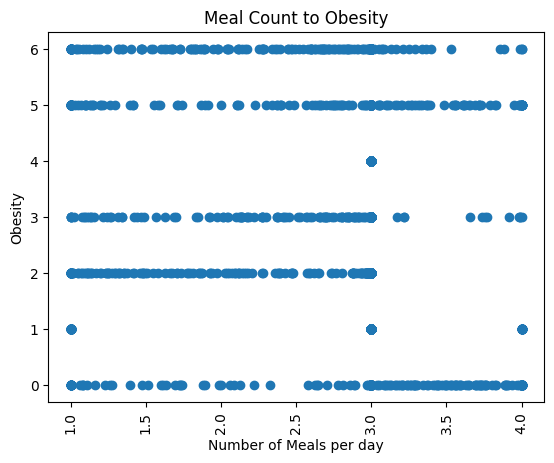

In [110]:
make_scatter("NCP", "Meal Count to Obesity", "Number of Meals per day")

# Meal count doesn't consider size of meal count
# CHECK RELATIONSHIP between meal count and caloric meals and snacking

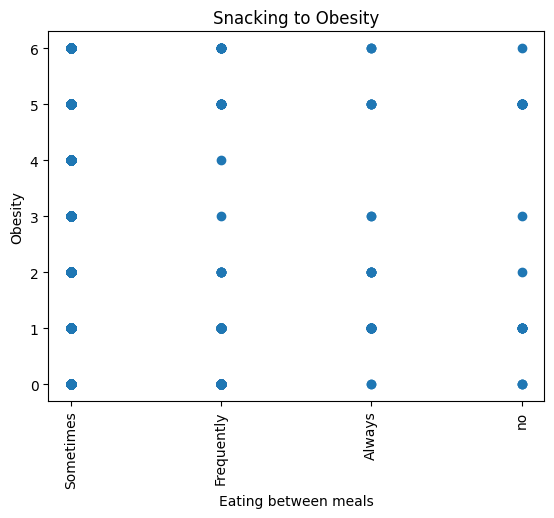

In [111]:
make_scatter("CAEC", "Snacking to Obesity", "Eating between meals")

# CHECK RELATIONSHIP between meal count and caloric meals and snacking

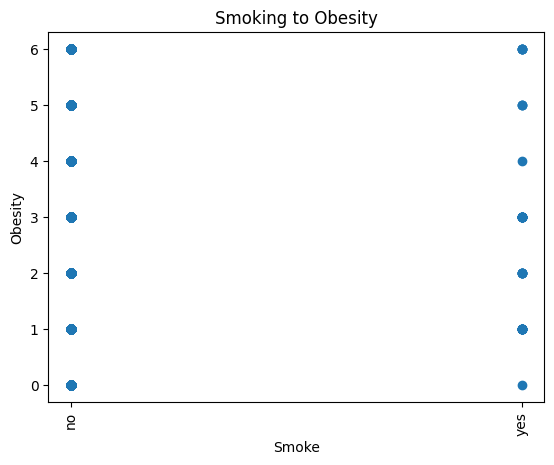

In [112]:
#HABITS

make_scatter("SMOKE", "Smoking to Obesity", "Smoke")

# All classifications are met despite smoking or not

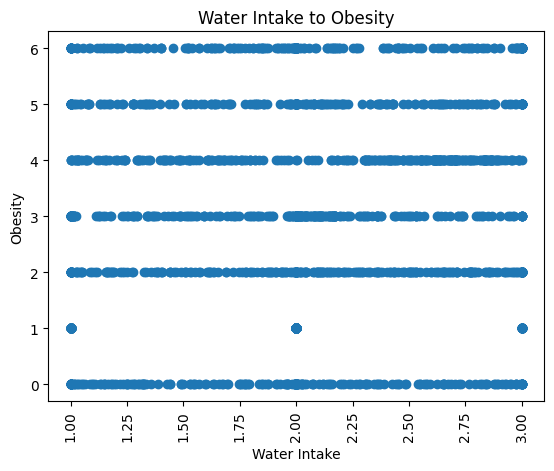

In [113]:
make_scatter("CH2O", "Water Intake to Obesity", "Water Intake")

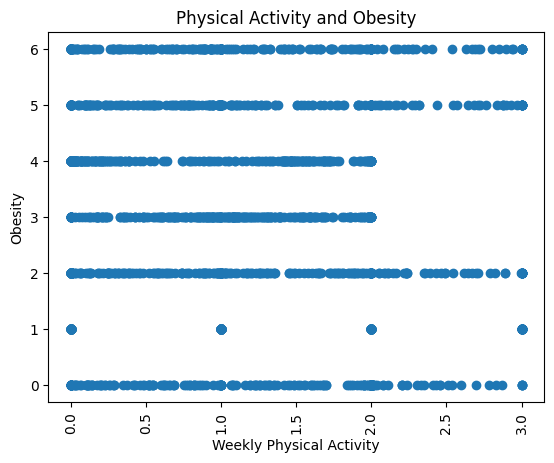

In [114]:
make_scatter("FAF", "Physical Activity and Obesity", "Weekly Physical Activity")

# Higher obesity classifications seem to workout less; no cases complete more than 2 physical activities per week
# Normal weight surveyors don't consider decimal workouts (?)

# CHECK RELATIONSHIP between physical activity and transportation (!!!!!!!!!!!!!)
# CHECK RELATIONSHIP between physical activity and meal tracking (!!!!!!!!!!!!!)
# CHECK RELATIONSHIP between physical activity and family history (!!!!!!!!!!!!!)

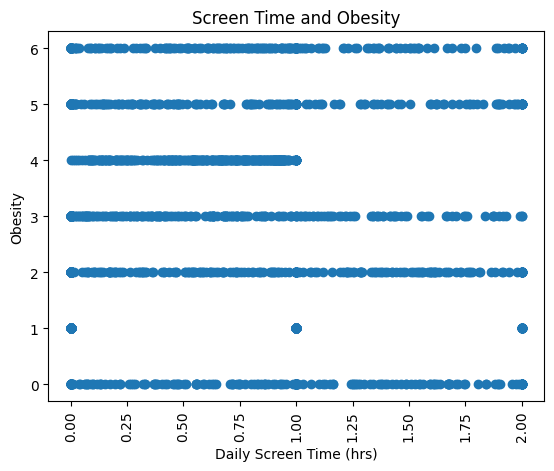

In [115]:
make_scatter("TUE", "Screen Time and Obesity", "Daily Screen Time (hrs)")

# not too much screen time

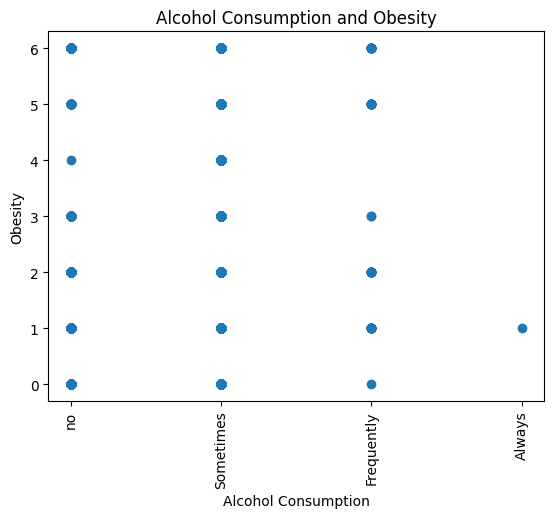

In [116]:
make_scatter("CALC", "Alcohol Consumption and Obesity", "Alcohol Consumption Frequency")

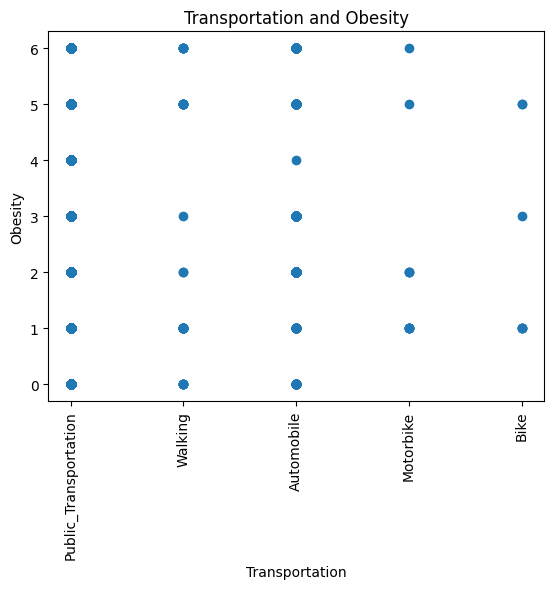

In [117]:
make_scatter("MTRANS", "Transportation and Obesity", "Transportation")

#some of these methods of transportation are more accessible than others

Among all these relations, it's clear that although some aspects are related, not all cases of obesity are caused by one factor itself.

Below are some more plots to be conducted off of observations:

- family history of obesity and weight
- meal count and caloric meals
- meal count and snacking
- caloric meals and snacking
- physical activity and transportation
- physical activity and meal tracking
- physical activity and family history

****GET BACK TO THIS AND FINISH THESE PLOTS!!!!!!!!!!!!!!!!!!!**** ()()()()()

***Null Hypothesis Testing***

Null Hypothesis: The most important behavioral contributors to obesity are diet and activity.
(p = 0.05)

Alternative Hypothesis: The most important behavioral contributors to obesity are relationships and interaction.





In [118]:
# need to make a hypothesis and test ^^^^

***Scaling + Modeling***


In [119]:
# encoding only STRING values because they change the numeric values when encoded
df_str_encoded = df.select_dtypes(include=['object'])

for col in df_str_encoded.columns:
    df_str_encoded[col] = le.fit_transform(df_str_encoded[col].astype(str))

In [120]:
scaler_standard = StandardScaler()
scaled_data_standard = scaler_standard.fit_transform(df_str_encoded)

In [121]:
# t-SNE Model (OBJECT DATA)

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_str_encoded)
tsne_df = pd.DataFrame(data = tsne_results, columns=['Dimension1', 'Dimension2'])

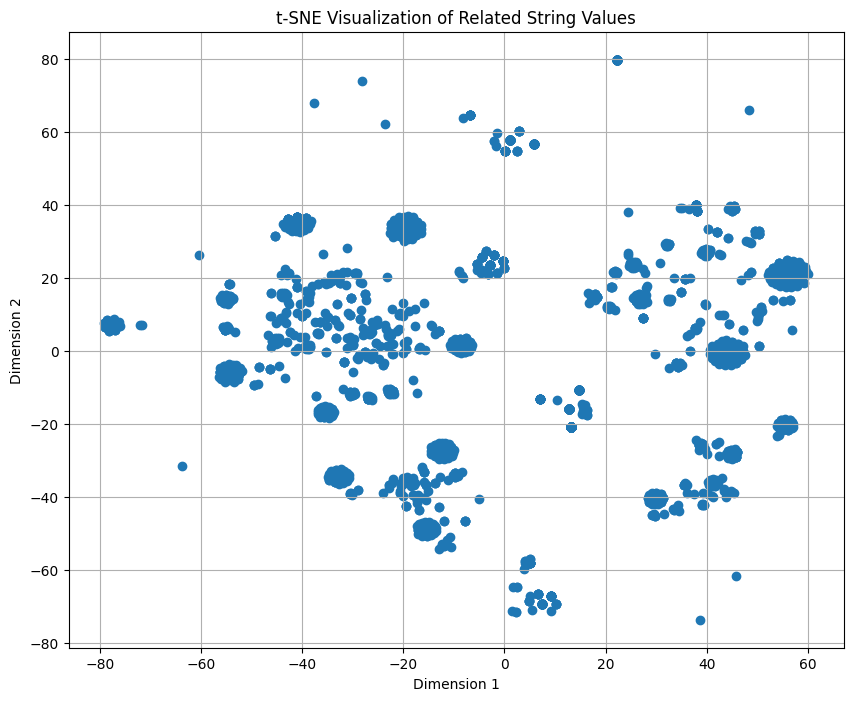

In [122]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['Dimension1'], tsne_df['Dimension2'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Visualization of Related String Values')
plt.grid(True)
plt.show()

In [123]:
# separating FLOAT values
df_flts = df.select_dtypes(exclude=['object'])

In [124]:
# t-SNE Model (NUMERIC DATA)

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_flts)
tsne_df = pd.DataFrame(data = tsne_results, columns=['Dimension1', 'Dimension2'])

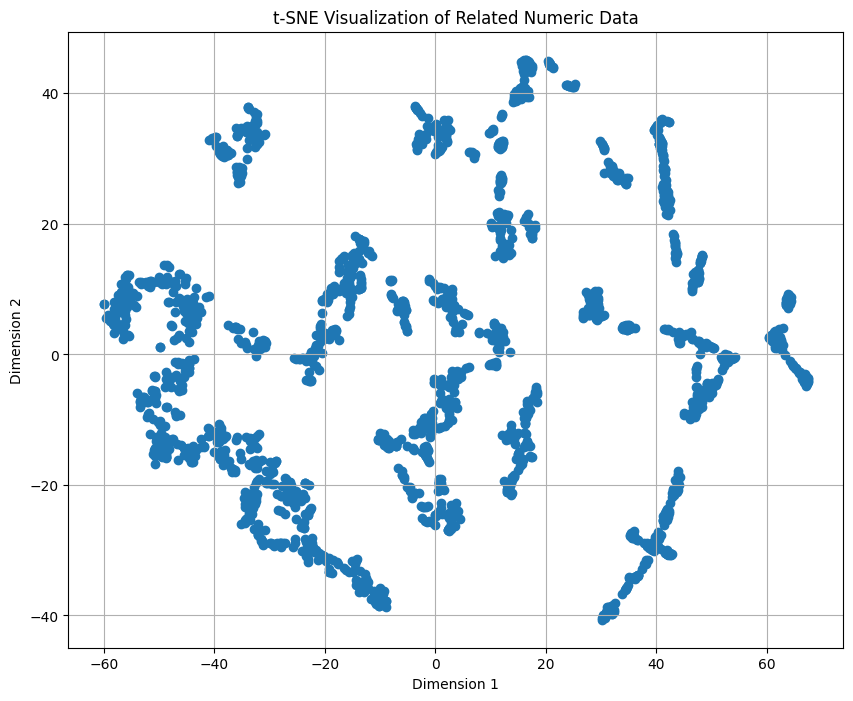

In [125]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['Dimension1'], tsne_df['Dimension2'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Visualization of Related Numeric Data')
plt.grid(True)
plt.show()